In [37]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from helpers import *
from plots import *
import datetime
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [38]:
from proj1_helpers import *
DATA_TRAIN_PATH = 'train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [39]:
tX.shape, y.shape

((250000, 30), (250000,))

In [40]:
y=y.reshape(len(y),1)
y.shape

(250000, 1)

In [41]:
tX

array([[ 138.47 ,   51.655,   97.827, ...,    1.24 ,   -2.475,  113.497],
       [ 160.937,   68.768,  103.235, ..., -999.   , -999.   ,   46.226],
       [-999.   ,  162.172,  125.953, ..., -999.   , -999.   ,   44.251],
       ..., 
       [ 105.457,   60.526,   75.839, ..., -999.   , -999.   ,   41.992],
       [  94.951,   19.362,   68.812, ..., -999.   , -999.   ,    0.   ],
       [-999.   ,   72.756,   70.831, ..., -999.   , -999.   ,    0.   ]])

In [41]:
df= pd.read_csv(DATA_TRAIN_PATH)
#df

In [42]:
#df.iloc[:,18:]

In [43]:
#df['PRI_lep_pt']

Calcul de moyennes. Il faut faire une fonction !

In [44]:
#st_tX, n_mean, n_std= standardize(tX, mean_x=None, std_x=None)

On standardise cet array

In [45]:
#std_tX, new_mean, new_std= standardize(new_tX, mean_x=None, std_x=None)

In [46]:
#print(std_tX.shape, new_mean, new_std)

# First method
We remove all columns containing -999. using remove_outlier_columns function.

In [33]:
new_tX, new_mean, new_std = standardize(remove_outlier_columns(tX), mean_x=None, std_x=None)
new_tX.shape

(250000, 20)

# Second method
We transform all the -999. values by the mean of the columns (calculated without counting the -999.)

In [43]:
mean_tX, mean_mean, mean__std = standardize(undefToMeanMean(tX), mean_x=None, std_x=None)
mean_tX

array([[  1.00000000e+00,   3.14910656e-01,   6.83319669e-02, ...,
          1.14381874e+00,  -2.52714288e+00,   4.12510497e-01],
       [  1.00000000e+00,   7.40827026e-01,   5.52504823e-01, ...,
          2.27720906e-14,  -9.07315481e-15,  -2.73819964e-01],
       [  1.00000000e+00,  -1.00190288e-12,   3.19515553e+00, ...,
          2.27720906e-14,  -9.07315481e-15,  -2.93969845e-01],
       ..., 
       [  1.00000000e+00,  -3.10930673e-01,   3.19316447e-01, ...,
          2.27720906e-14,  -9.07315481e-15,  -3.17017229e-01],
       [  1.00000000e+00,  -5.10097335e-01,  -8.45323970e-01, ...,
          2.27720906e-14,  -9.07315481e-15,  -7.45439413e-01],
       [  1.00000000e+00,  -1.00190288e-12,   6.65336083e-01, ...,
          2.27720906e-14,  -9.07315481e-15,  -7.45439413e-01]])

# Linear regression
### with gradient descent method

In [18]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.04
initial_w = np.zeros((new_tX.shape[1], 1))
gd_losses, gd_ws, gd_loss, gd_w = least_square_GD(y, new_tX, initial_w, gamma,max_iters)

Gradient Descent(499/499): loss=0.35272036640530235


# Linear regression
### with stochastique gradient descent

In [19]:
# Define the parameters of the algorithm.
max_iters = 1
batch_size=1

# For the moment we use this gamma
gamma = 0.04

initial_w = np.zeros((new_tX.shape[1], 1))

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws, sgd_loss, sgd_w  = least_square_SGD(y, new_tX, batch_size, initial_w, max_iters, 500 , gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

0
Gradient Descent(0/0): loss=0.7400548657949996
SGD: execution time=6.256 seconds


Attention a retirer la premiere coordonnée de y avant de l'utiliser !

# Least square method

In [20]:
LS_weight, LS_mse= least_squares(y,mean_tX)
print(LS_weight)
#print(LS_mse)

On retire w0

In [21]:
#TLS_weight=LS_weight[1:]

# Ridge Regression

In [22]:
lambda_=0.1
w, RR_mse = ridge_regression(y, new_tX, lambda_)
w.shape, RR_mse

((20, 1), 0.36119518034873904)

In [23]:
true_w = w[1:]

# Logistic Regression
### with gradient descent method

ONLY FOR LOGISTIC REGRESSION:
y take only 1 and 0 values

In [44]:
for i in range(len(y)):
    if y[i]==-1:
        y[i]=0

We define some parameters.

In [47]:
max_iters = 500
threshold = 1e-8
alpha = 0.000001

initial_w = np.zeros((mean_tX.shape[1], 1))


We call logistic regression with gradient descent --> with true argument 

In [57]:
l,w = logistic_regression(y, mean_tX, initial_w, alpha, max_iters, threshold, True)

Current iteration=0, the loss=173286.79513998624
Current iteration=100, the loss=128088.95664231233
Current iteration=200, the loss=126489.88878466225
Current iteration=300, the loss=125809.27959769037
Current iteration=400, the loss=125450.91783584088
The loss=125243.46528896007


### with newton's method

We call logistic regression with newton method --> with false argument 

In [23]:
l,w = logistic_regression(y, new_tX, initial_w, alpha, max_iters, threshold, False)

Current iteration=0, the loss=173286.79513998624
Current iteration=100, the loss=173279.42150918
Current iteration=200, the loss=173272.04935281907
Current iteration=300, the loss=173264.6786704757
Current iteration=400, the loss=173257.30946171956
The loss=173250.01539618877


# Penalized Logistic Regression
### with gradient descent

In [15]:
y[y==-1] = 0

Define some parameters

In [8]:
max_iter = 1000
alpha = 0.00001
lambda_ = 0.01
threshold = 1e-8
initial_w = np.zeros((new_tX.shape[1], 1))

In [9]:
reg_l, reg_w = reg_logistic_regression(y, new_tX, initial_w, lambda_, alpha, max_iter, threshold)

Current iteration=0, the loss=173286.79513998624
Current iteration=200, the loss=137382.66457474587
Current iteration=400, the loss=137314.78914766252
Current iteration=600, the loss=137314.1573722657
Current iteration=800, the loss=137314.15134572494
The loss=139040.9305297237


# Cross Validation
## Ploting on vairious lambda

(250000, 1)
(250000, 20)


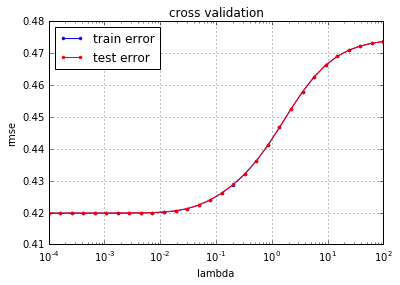

In [14]:
def cross_validation_demo(seed,degree,k_fold,lambdas):
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    print(y.shape)
    print(new_tX.shape)
    for lambda_ in lambdas:
        loss_tr, loss_te = cross_validation(y, new_tX, k_indices, k_fold, lambda_, degree)
        rmse_tr.append(loss_tr)
        rmse_te.append(loss_te)
    
    # ***************************************************    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo(2000,1,10,np.logspace(-4, 2, 30))

## Do your thing crazy machine learning thing here :) ...

## Generate predictions and save ouput in csv format for submission:

In [53]:
DATA_TEST_PATH = 'test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

Pour la méthode 2:

In [58]:
mean_tX_test, mean_mean, mean__std = standardize(undefToMeanMean(tX_test), mean_x=None, std_x=None)

In [60]:
OUTPUT_PATH = 'mean_logistic1.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(w, mean_tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)